<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-05-15 13:58:11--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.01s   

2020-05-15 13:58:11 (1.48 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object 

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [7]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /srv/conda/envs/notebook

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.1.1   |                0         132 KB  anaconda
    certifi-2020.4.5.1         |           py36_0         159 KB  anaconda
    openssl-1.1.1g             |       h7b6447c_0         3.8 MB  anaconda
    seaborn-0.10.1             |             py_0         160 KB  anaconda
    ------------------------------------------------------------
                                           Total:         4.2 MB

The following NEW packages will be INSTALLED:

  seaborn            anaconda/noarch::seaborn-0.10.1-py_0

The followin

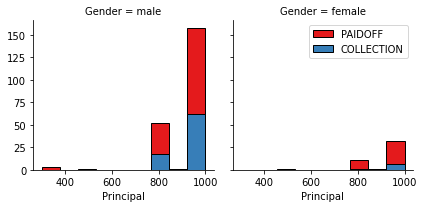

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

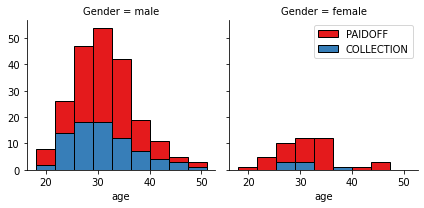

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

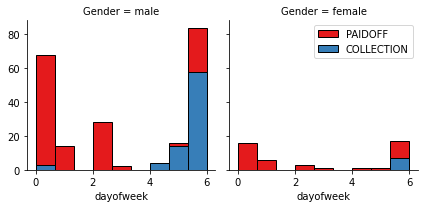

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)


## One Hot Encoding  
#### How about education?

In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [15]:
df[['Principal','terms','age','Gender','weekend','education']].head()

,Principal,terms,age,Gender,weekend,education
0,1000,30,45,0,0,High School or Below
1,1000,30,33,1,0,Bechalor
2,1000,15,27,0,0,college
3,1000,30,28,1,1,college
4,1000,30,29,0,1,college


In [16]:
Feat=df[['Principal','terms','age','Gender','weekend','education']]

#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [17]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feat=Feature
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [18]:
X=Feat
X

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1
...,...,...,...,...,...,...,...,...
341,800,15,32,0,1,0,1,0
342,1000,30,25,0,1,0,1,0
343,800,15,39,0,0,0,0,1
344,1000,30,28,0,0,0,0,1


### Feature selection

Lets defind feature sets, X:

What are our lables?

In [19]:
df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)
df.head()

y = df['loan_status'].values
#y.dtype

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [20]:
from sklearn.preprocessing import StandardScaler
data = Feat
scaler = StandardScaler()
print(data)
scaled_data = scaler.fit_transform(data)

     Principal  terms  age  Gender  weekend  Bechalor  High School or Below  \
0         1000     30   45       0        0         0                     1   
1         1000     30   33       1        0         1                     0   
2         1000     15   27       0        0         0                     0   
3         1000     30   28       1        1         0                     0   
4         1000     30   29       0        1         0                     0   
..         ...    ...  ...     ...      ...       ...                   ...   
341        800     15   32       0        1         0                     1   
342       1000     30   25       0        1         0                     1   
343        800     15   39       0        0         0                     0   
344       1000     30   28       0        0         0                     0   
345       1000     30   26       0        0         0                     0   

     college  
0          0  
1          0  
2     

In [21]:
Feat = preprocessing.StandardScaler().fit(Feat).transform(Feat.astype(float))
scaler = StandardScaler()
print(scaler.fit(Feat))
StandardScaler()
print(scaler.mean_)
print(scaler.transform(data))
#X[0:5]


StandardScaler(copy=True, with_mean=True, with_std=True)
[ 3.79914469e-16  8.21436689e-17 -2.05359172e-16 -4.87728034e-17
  8.21436689e-17 -5.13397930e-18  8.21436689e-17  0.00000000e+00]
[[ 1.00000000e+03  3.00000000e+01  4.50000000e+01 ...  5.13397930e-18
   1.00000000e+00  0.00000000e+00]
 [ 1.00000000e+03  3.00000000e+01  3.30000000e+01 ...  1.00000000e+00
  -8.21436689e-17  0.00000000e+00]
 [ 1.00000000e+03  1.50000000e+01  2.70000000e+01 ...  5.13397930e-18
  -8.21436689e-17  1.00000000e+00]
 ...
 [ 8.00000000e+02  1.50000000e+01  3.90000000e+01 ...  5.13397930e-18
  -8.21436689e-17  1.00000000e+00]
 [ 1.00000000e+03  3.00000000e+01  2.80000000e+01 ...  5.13397930e-18
  -8.21436689e-17  1.00000000e+00]
 [ 1.00000000e+03  3.00000000e+01  2.60000000e+01 ...  5.13397930e-18
  -8.21436689e-17  1.00000000e+00]]


In [54]:
# import scoring methods
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score


# our data for training (used '_train' just for improving readability)
X_train, y_train=X,y

X_train.shape, y_train.shape
y_train.dtype
# a dictionary for keeping all scores of the classifiers
trainScores={}

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [23]:
from sklearn.neighbors import KNeighborsClassifier

bestScore=0.0
accList=[]

for k in range(3,12):
    
    clf_knn = KNeighborsClassifier(n_neighbors=k,algorithm='auto')
    
    # using 10 fold cross validation for scoring the classifier's accuracy
    scores = cross_val_score(clf_knn, X, y, cv=10)
    score=scores.mean()
    accList.append(score)
    
    if score > bestScore:
        bestScore=score
        best_clf=clf_knn
        bestK=k
        
print("Best K is :",bestK,"| Cross validation Accuracy :",bestScore)
clf_knn=best_clf

Best K is : 6 | Cross validation Accuracy : 0.7517647058823529


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
from sklearn.neighbors import KNeighborsClassifier

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [25]:
clf_knn.fit(X_train,y_train)
y_pred=best_clf.predict(X_train)

In [55]:
trainScores['KNN-jaccard']=jaccard_score(y_train, y_pred)
trainScores['KNN-f1-score']=f1_score(y_train, y_pred, average='weighted')
trainScores

ValueError: Found input variables with inconsistent numbers of samples: [54, 276]

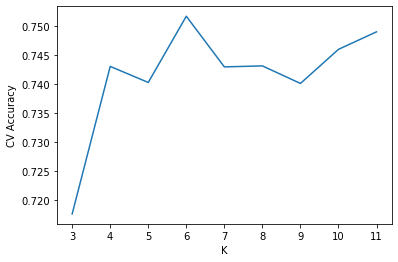

In [27]:
plt.plot(range(3,12),accList)
plt.xlabel('K')
plt.ylabel('CV Accuracy')
plt.show()

Test set Accuracy:  0.7714285714285715  - k = 2
Test set Accuracy:  0.6857142857142857  - k = 3
Test set Accuracy:  0.7714285714285715  - k = 4
Test set Accuracy:  0.7285714285714285  - k = 5
Test set Accuracy:  0.7571428571428571  - k = 6
Test set Accuracy:  0.6857142857142857  - k = 7
Test set Accuracy:  0.7428571428571429  - k = 8
Test set Accuracy:  0.7428571428571429  - k = 9
Test set Accuracy:  0.7428571428571429  - k = 10
Test set Accuracy:  0.7285714285714285  - k = 11


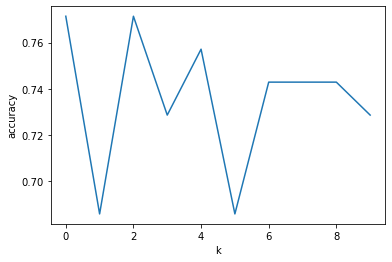

In [28]:
from sklearn import metrics

k_acc= []

k = 1
for k in range(2, 12):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    #neigh
    yhat = neigh.predict(X_test)
    #yhat[0:5]
    #print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
    print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat), " - k =", k)
    k_acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.plot(k_acc)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

# Decision Tree

In [82]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion="entropy")
decision_tree # it shows the default parameters
decision_tree.fit(X_train,y_train)
pred_tree = decision_tree.predict(X_test)

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, pred_tree))
pred_tree

DecisionTrees's Accuracy:  0.7285714285714285


array([1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0])

In [144]:
trainScores['Tree-jaccard']=jaccard_similarity_score(y_train, y_pred)
trainScores['Tree-f1-score']=f1_score(y_train, y_pred, average='weighted')
trainScores

ValueError: Found input variables with inconsistent numbers of samples: [54, 276]

# Support Vector Machine

In [134]:
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score


clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train) 
yhat = clf.predict(X_test)
print("SVM linear kernel: accuracy ", metrics.accuracy_score(y_test, yhat), " - F1: ", f1_score(y_test, yhat, average='weighted'), " - jaccard: ", jaccard_score(y_test, yhat))



clf = svm.SVC(kernel='poly')
clf.fit(X_train, y_train) 
yhat = clf.predict(X_test)
print("SVM polynomial kernel: accuracy ", metrics.accuracy_score(y_test, yhat), " - F1: ", f1_score(y_test, yhat, average='weighted'), " - jaccard: ", jaccard_score(y_test, yhat))


clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 
yhat = clf.predict(X_test)
print("SVM rbf kernel: accuracy ", metrics.accuracy_score(y_test, yhat), " - F1: ", f1_score(y_test, yhat, average='weighted'), " - jaccard: ", jaccard_score(y_test, yhat))


clf = svm.SVC(kernel='sigmoid')
clf.fit(X_train, y_train) 
yhat = clf.predict(X_test)
print("SVM sigmoid kernel: accuracy ", metrics.accuracy_score(y_test, yhat), " - F1: ", f1_score(y_test, yhat, average='weighted'), " - jaccard: ", jaccard_score(y_test, yhat))

print("\n\nLet's stick with a linear kernel")
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train) 
yhat = clf.predict(X_test)
print("SVM linear kernel: accuracy ", metrics.accuracy_score(y_test, yhat), " - F1: ", f1_score(y_test, yhat, average='weighted'), " - jaccard: ", jaccard_score(y_test, yhat))


print (classification_report(y_test, yhat))



SVM linear kernel: accuracy  0.7571428571428571  - F1:  0.7381366459627329  - jaccard:  0.19047619047619047
SVM polynomial kernel: accuracy  0.7857142857142857  - F1:  0.6914285714285714  - jaccard:  0.0
SVM rbf kernel: accuracy  0.7857142857142857  - F1:  0.6914285714285714  - jaccard:  0.0
SVM sigmoid kernel: accuracy  0.7857142857142857  - F1:  0.6914285714285714  - jaccard:  0.0


Let's stick with a linear kernel
SVM linear kernel: accuracy  0.7571428571428571  - F1:  0.7381366459627329  - jaccard:  0.19047619047619047
              precision    recall  f1-score   support

           0       0.82      0.89      0.85        55
           1       0.40      0.27      0.32        15

    accuracy                           0.76        70
   macro avg       0.61      0.58      0.59        70
weighted avg       0.73      0.76      0.74        70



NameError: name 'plot_confusion_matrix' is not defined

<Figure size 432x288 with 0 Axes>

# Logistic Regression

In [154]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.01,max_iter=100000, solver='newton-cg').fit(X_train,y_train)
yhat_lr = LR.predict(X_test)
print("LR newton-cg solver: accuracy ", metrics.accuracy_score(y_test, yhat_lr), " - F1: ", f1_score(y_test, yhat_lr, average='weighted'), " - jaccard: ", jaccard_score(y_test, yhat_lr))

LR = LogisticRegression(C=0.01,max_iter=100000, solver='lbfgs').fit(X_train,y_train)
yhat_lr = LR.predict(X_test)
print("LR lbfgs solver: accuracy ", metrics.accuracy_score(y_test, yhat_lr), " - F1: ", f1_score(y_test, yhat_lr, average='weighted'), " - jaccard: ", jaccard_score(y_test, yhat_lr))

LR = LogisticRegression(C=0.01,max_iter=100000, solver='liblinear').fit(X_train,y_train)
yhat_lr = LR.predict(X_test)
print("LR liblinear solver: accuracy ", metrics.accuracy_score(y_test, yhat_lr), " - F1: ", f1_score(y_test, yhat_lr, average='weighted'), " - jaccard: ", jaccard_score(y_test, yhat_lr))

LR = LogisticRegression(C=0.01,max_iter=100000, solver='sag').fit(X_train,y_train)
yhat_lr = LR.predict(X_test)
print("LR sag solver: accuracy ", metrics.accuracy_score(y_test, yhat_lr), " - F1: ", f1_score(y_test, yhat_lr, average='weighted'), " - jaccard: ", jaccard_score(y_test, yhat_lr))

LR = LogisticRegression(C=0.01,max_iter=100000, solver='saga').fit(X_train,y_train)
yhat_lr = LR.predict(X_test)
print("LR saga solver: accuracy ", metrics.accuracy_score(y_test, yhat_lr), " - F1: ", f1_score(y_test, yhat_lr, average='weighted'), " - jaccard: ", jaccard_score(y_test, yhat_lr))

print("\n\n\nwe'll stick with the saga solver")
LR = LogisticRegression(C=0.01,max_iter=100000, solver='saga').fit(X_train,y_train)
yhat_lr = LR.predict(X_test)
print("LR saga solver: accuracy ", metrics.accuracy_score(y_test, yhat_lr), " - F1: ", f1_score(y_test, yhat_lr, average='weighted'), " - jaccard: ", jaccard_score(y_test, yhat_lr))

LR newton-cg solver: accuracy  0.7857142857142857  - F1:  0.6914285714285714  - jaccard:  0.0
LR lbfgs solver: accuracy  0.7857142857142857  - F1:  0.6914285714285714  - jaccard:  0.0
LR liblinear solver: accuracy  0.7857142857142857  - F1:  0.6914285714285714  - jaccard:  0.0
LR sag solver: accuracy  0.7857142857142857  - F1:  0.6914285714285714  - jaccard:  0.0
LR saga solver: accuracy  0.7857142857142857  - F1:  0.6914285714285714  - jaccard:  0.0



we'll stick with the saga solver
LR saga solver: accuracy  0.7857142857142857  - F1:  0.6914285714285714  - jaccard:  0.0


# Model Evaluation using Test set

In [73]:
#from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [74]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-05-15 14:25:32--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2020-05-15 14:25:32 (364 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [75]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

In [76]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])

test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek

test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)


test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)


test_df.head()


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


In [77]:

test_df['Month'] = test_df.due_date.dt.month 

test_df['deadline']=test_df['due_date']-test_df['effective_date']
test_df['deadline']=test_df['deadline'].dt.days

Feature = test_df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(test_df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)

X = Feature

y = test_df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1]).values

#df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)
y.dtype

dtype('int64')

In [48]:
X[1:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0])

In [109]:
########################################testy=y.astype(int)
testy[1:10]
testX= preprocessing.StandardScaler().fit_transform(X)

In [110]:
testScores={}
test_df.head()

X = Feature
testy.dtype

dtype('int64')

In [108]:

testy.dtype

dtype('<U21')

In [123]:
knn_pred=clf_knn.predict(testX)
#knn_pred.shape
y.shape
#testScores['KNN-jaccard']=jaccard_score(y, knn_pred)
#testScores['KNN-f1-score']=f1_score(y, knn_pred, average='weighted')
testScores

{'Tree-f1-score': 0.6304176516942475,
 'Tree-jaccard': 0.0,
 'SVM-jaccard': 0.4117647058823529,
 'SVM-f1-score': 0.6450617283950616,
 'LogReg-jaccard': 0.2777777777777778,
 'LogReg-f1-score': 0.5428289439509636,
 'LogReg-logLoss': 0.6922846755224566}

In [127]:
#for knn
from sklearn.metrics import classification_report
cr = classification_report(y_test, yhat)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.89      0.85        55
           1       0.40      0.27      0.32        15

    accuracy                           0.76        70
   macro avg       0.61      0.58      0.59        70
weighted avg       0.73      0.76      0.74        70



In [85]:
testX.shape

(54, 8)

In [122]:
tree_pred=decision_tree.predict(testX)
testy.shape
testScores['Tree-jaccard']=jaccard_score(testy, tree_pred)
testScores['Tree-f1-score']=f1_score(testy, tree_pred, average='weighted')
testScores

{'Tree-f1-score': 0.6304176516942475,
 'Tree-jaccard': 0.0,
 'SVM-jaccard': 0.4117647058823529,
 'SVM-f1-score': 0.6450617283950616,
 'LogReg-jaccard': 0.2777777777777778,
 'LogReg-f1-score': 0.5428289439509636,
 'LogReg-logLoss': 0.6922846755224566}

In [124]:
svm_pred=clf.predict(testX)
testScores['SVM-jaccard']=jaccard_score(testy, svm_pred)
testScores['SVM-f1-score']=f1_score(testy, svm_pred, average='weighted')
testScores

{'Tree-f1-score': 0.6304176516942475,
 'Tree-jaccard': 0.0,
 'SVM-jaccard': 0.4117647058823529,
 'SVM-f1-score': 0.6450617283950616,
 'LogReg-jaccard': 0.2777777777777778,
 'LogReg-f1-score': 0.5428289439509636,
 'LogReg-logLoss': 0.6922846755224566}

In [132]:
# for SVM
classification_report(y_test,yhat )
print('SVM ACCY:', classification_report(y_test, yhat))

SVM ACCY:               precision    recall  f1-score   support

           0       0.82      0.89      0.85        55
           1       0.40      0.27      0.32        15

    accuracy                           0.76        70
   macro avg       0.61      0.58      0.59        70
weighted avg       0.73      0.76      0.74        70



In [125]:
log_pred=LR.predict(testX)
proba=LR.predict_proba(testX)
testScores['LogReg-jaccard']=jaccard_score(testy, log_pred)
testScores['LogReg-f1-score']=f1_score(testy, log_pred, average='weighted')  
testScores['LogReg-logLoss']=log_loss(testy, proba)
testScores

{'Tree-f1-score': 0.6304176516942475,
 'Tree-jaccard': 0.0,
 'SVM-jaccard': 0.4117647058823529,
 'SVM-f1-score': 0.6450617283950616,
 'LogReg-jaccard': 0.2777777777777778,
 'LogReg-f1-score': 0.5428289439509636,
 'LogReg-logLoss': 0.6922829744398471}

In [133]:
#for logit
classification_report(y_test, yhat)
print('Logit', classification_report(y_test, yhat))

Logit               precision    recall  f1-score   support

           0       0.82      0.89      0.85        55
           1       0.40      0.27      0.32        15

    accuracy                           0.76        70
   macro avg       0.61      0.58      0.59        70
weighted avg       0.73      0.76      0.74        70



In [153]:
#test the KNN algorithm already trained with K=6
yhatKNN=neigh.predict(X)
KNNJaccard = jaccard_score(y, yhatKNN)
KNNF1 = f1_score(y, yhatKNN, average='weighted')
print("Avg F1-score: %.2f" % KNNF1 )
print("KNN Jaccard Score: %.2f" % KNNJaccard)



Avg F1-score: 0.66
KNN Jaccard Score: 0.07


In [152]:

yhatDEC = decision_tree.predict(X)
DTJaccard = jaccard_score(y, yhatDEC)
DTF1 = f1_score(y, yhatDEC, average='weighted')
print("Avg F1-score: %.2f" % DTF1 )
print("Decision Tree Jaccard Score: %.2f" % DTJaccard)


Avg F1-score: 0.96
Decision Tree Jaccard Score: 0.86


In [151]:

yhatSVM=clf.predict(X)
SVMJaccard = jaccard_score(y, yhatSVM)
SVMF1 = f1_score(y, yhatSVM, average='weighted')
print("Avg F1-score: %.2f" % SVMF1)
print("SVM Jaccard score: %.2f" % SVMJaccard)



Avg F1-score: 0.79
SVM Jaccard score: 0.33


In [150]:
yhatLOG = LR.predict(X)
yhatLOGproba = LR.predict_proba(X)
LogRJaccard = jaccard_score(y, yhatLOG)
LogRF1 = f1_score(y, yhatLOG, average='weighted')
Logloss = log_loss(y, yhatLOGproba)
print("LogLoss: : %.2f" % Logloss)
print("Avg F1-score: %.4f" % LogRF1)
print("LOG Jaccard score: %.4f" % LogRJaccard)

LogLoss: : 0.57
Avg F1-score: 0.6304
LOG Jaccard score: 0.0000


| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.07    | 0.66     | NA      |
| Decision Tree      | 0.86    | 0.96     | NA      |
| SVM                | 0.33    | 0.79     | NA      |
| LogisticRegression | 0.57    | 0.63     | 0       |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>